#Attempt No. 00#

---

#Inspiration#
+ What are the best machine learning ensembles/methods for classifying the animals based upon the variables given?

#Dataset#
+ The dataset consists of 101 animals from a zoo. 
+ There are 16 variables with various traits to describe the animals. 
+ The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

##zoo.csv##
+ This csv contains the dataset.
+ Attribute Information: (name of attribute and type of value domain)
> + animal_name: Unique for each instance
> + hair Boolean
> + feathers Boolean
> + eggs Boolean
> + milk Boolean
> + airborne Boolean
> + aquatic Boolean
> + predator Boolean
> + toothed Boolean
> + backbone Boolean
> + breathes Boolean
> + venomous Boolean
> + fins Boolean
> + legs Numeric (set of values: {0,2,4,5,6,8})
> + tail Boolean
> + domestic Boolean
> + catsize Boolean
> + class_type Numeric (integer values in range [1,7])

##class.csv##
+ This csv describes the dataset.
> + Class_Number Numeric (integer values in range [1,7])
> + Number_Of_Animal_Species_In_Class Numeric
> + Class_Type character -- The actual word description of the class
> + Animal_Names character -- The list of the animals that fall in the category of the class

#Acknowledgements#
+ UCI Machine Learning: https://archive.ics.uci.edu/ml/datasets/Zoo

## Load libraries ##

In [1]:
import seaborn
import numpy
import sys

from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

## Check the available data files ##

In [2]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

class.csv
zoo.csv



## Load data ##

In [3]:
# load file [class.csv] into dataframe [_df_class]
_df_class = read_csv('../input/class.csv')

# load file [zoo.csv] into dataframe [_df_zoo]
_df_zoo = read_csv('../input/zoo.csv')

## Analyze data - descriptive statistics ##

In [4]:
# first 5 rows of dataframe [_df_class]
_df_class.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [5]:
# first 5 rows of dataframe [_df_zoo]
_df_zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


**As dataset [_df_class] seems to be the explanation for column [class_type] of dataset [_df_zoo], we'll focus on dataset [df_zoo]**

In [6]:
# (rows, cols) of dataframe [_df_zoo]
_df_zoo.shape

(101, 18)

In [7]:
# data types
_df_zoo.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

**Apart from [animal_name], all other columns are numeric, we might not need much data preprocessing**

In [8]:
set_option('precision',2)

In [9]:
_df_zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.00,101.0,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00
mean,0.43,0.2,0.58,0.41,0.24,0.36,0.55,0.60,0.82,0.79,0.08,0.17,2.84,0.74,0.13,0.44,2.83
std,0.50,0.4,0.50,0.49,0.43,0.48,0.50,0.49,0.38,0.41,0.27,0.38,2.03,0.44,0.34,0.50,2.10
min,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,0.00,0.00,1.00
50%,0.00,0.0,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,1.00,0.00,0.00,2.00
75%,1.00,0.0,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,1.00,0.00,1.00,4.00
max,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8.00,1.00,1.00,1.00,7.00


In [10]:
_df_zoo.corr(method='pearson')

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
hair,1.00,-0.43,-0.82,0.88,-1.98e-01,-0.47,-0.15,0.49,0.19,0.44,-1.04e-01,-0.28,0.39,4.90e-02,2.07e-01,0.46,-0.56
feathers,-0.43,1.00,0.42,-0.41,6.57e-01,-0.06,-0.10,-0.61,0.23,0.25,-1.46e-01,-0.22,-0.21,2.93e-01,3.16e-02,-0.14,-0.20
eggs,-0.82,0.42,1.00,-0.94,3.77e-01,0.38,0.01,-0.64,-0.34,-0.38,9.87e-02,0.16,-0.22,-2.21e-01,-1.56e-01,-0.51,0.66
milk,0.88,-0.41,-0.94,1.00,-3.67e-01,-0.36,-0.03,0.63,0.38,0.42,-2.42e-01,-0.16,0.21,2.10e-01,1.64e-01,0.57,-0.72
airborne,-0.20,0.66,0.38,-0.37,1.00e+00,-0.17,-0.30,-0.59,-0.10,0.29,8.53e-03,-0.25,0.04,9.48e-03,6.33e-02,-0.35,0.02
aquatic,-0.47,-0.06,0.38,-0.36,-1.73e-01,1.00,0.38,0.05,0.02,-0.64,8.79e-02,0.60,-0.36,-3.46e-02,-2.24e-01,-0.11,0.33
predator,-0.15,-0.10,0.01,-0.03,-2.95e-01,0.38,1.00,0.13,0.05,-0.26,1.15e-01,0.19,-0.10,1.89e-02,-3.10e-01,0.14,0.06
toothed,0.49,-0.61,-0.64,0.63,-5.94e-01,0.05,0.13,1.00,0.58,-0.07,-6.23e-02,0.36,-0.19,3.10e-01,6.94e-02,0.34,-0.47
backbone,0.19,0.23,-0.34,0.38,-1.05e-01,0.02,0.05,0.58,1.00,0.21,-2.47e-01,0.21,-0.43,7.32e-01,1.02e-01,0.36,-0.83
breathes,0.44,0.25,-0.38,0.42,2.86e-01,-0.64,-0.26,-0.07,0.21,1.00,-1.21e-01,-0.62,0.37,8.90e-02,1.24e-01,0.20,-0.52


In [11]:
# class distribution
_df_zoo.groupby('class_type').size()

class_type
1    41
2    20
3     5
4    13
5     4
6     8
7    10
dtype: int64

**Classes are not balanced**

## Visualize data - uni-variate ##

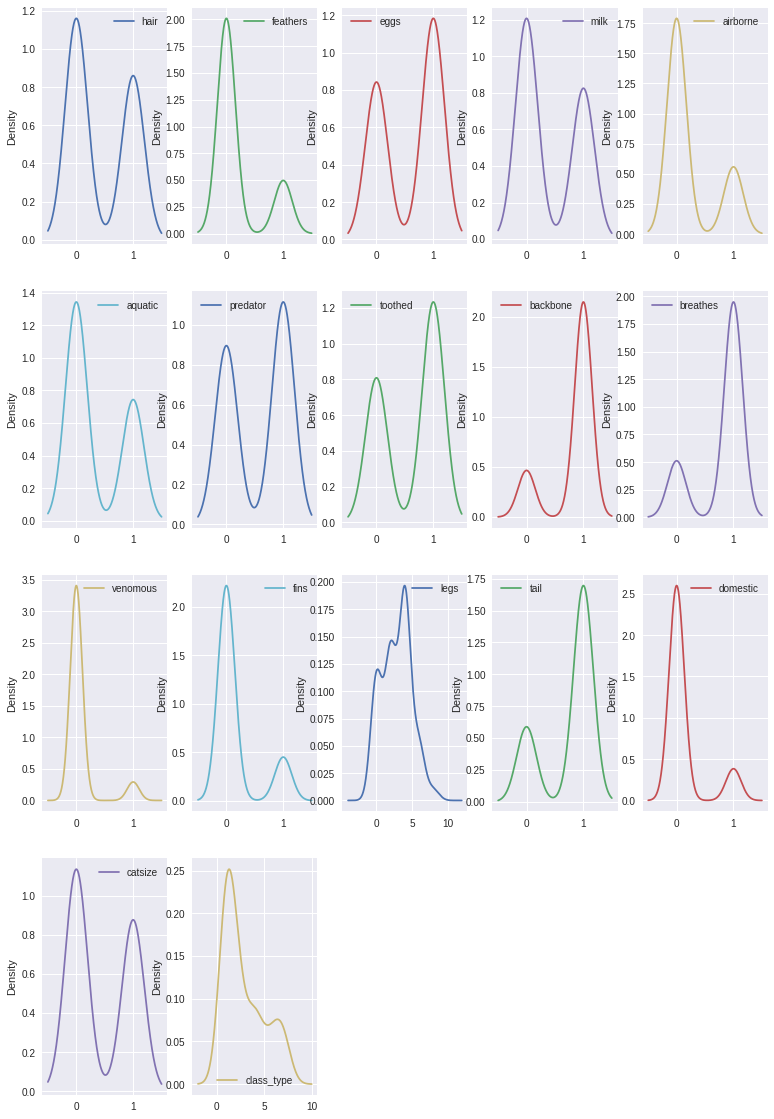

In [12]:
_df_zoo.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
pyplot.show()

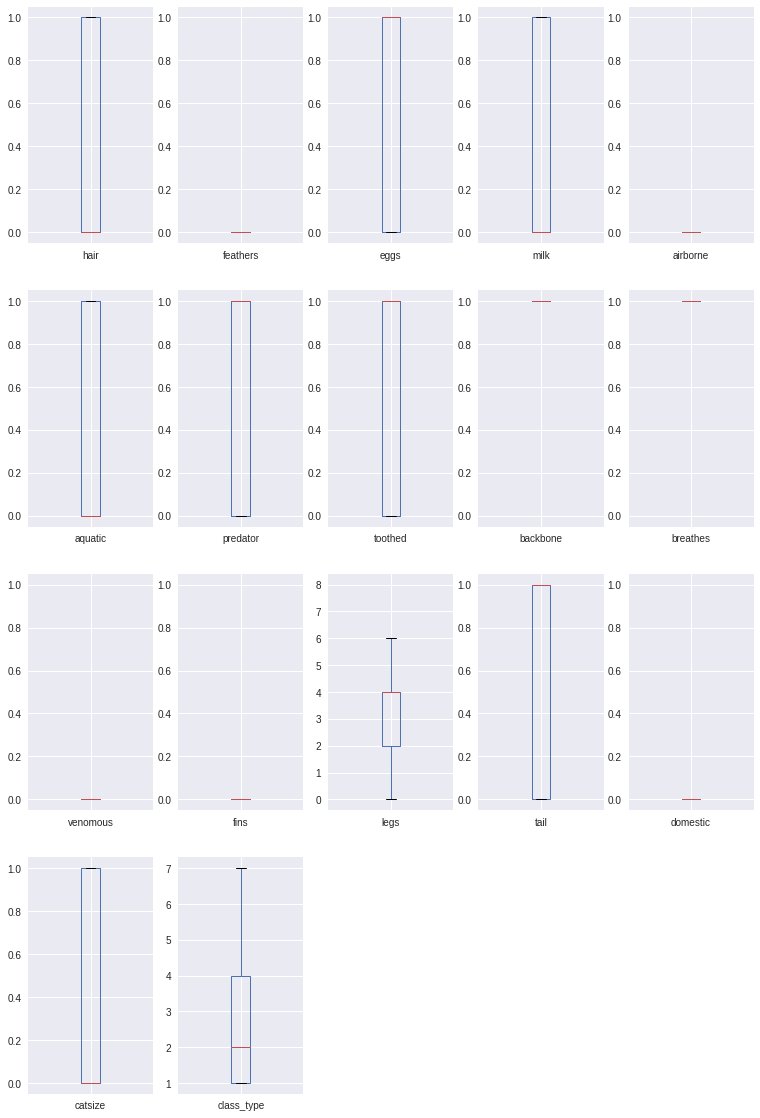

In [13]:
_df_zoo.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
pyplot.show()

## Visualize data - multi-variate ##

In [14]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = pyplot.subplots( figsize =( 14 , 12 ) )
    cmap = seaborn.diverging_palette( 220 , 10 , as_cmap = True )
    _ = seaborn.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

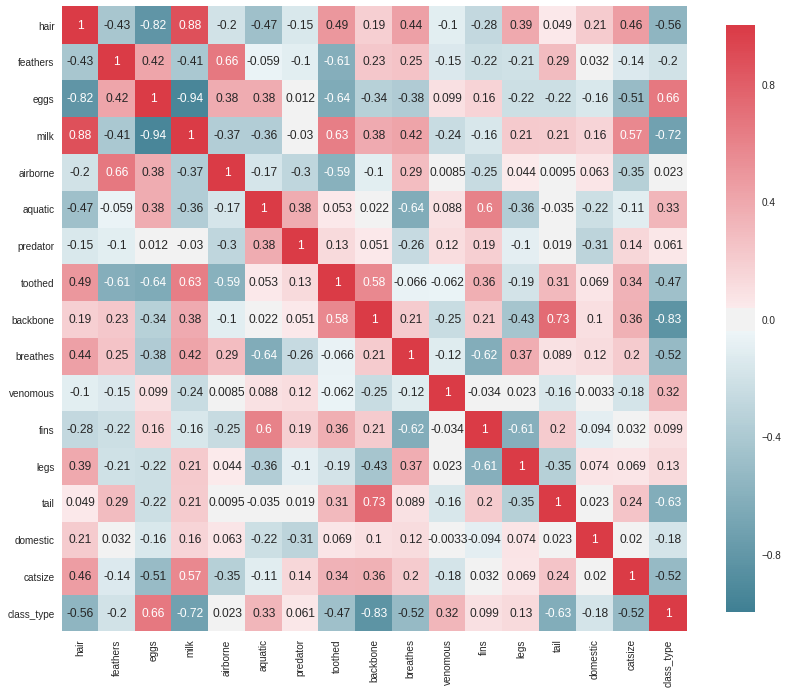

In [15]:
plot_correlation_map(_df_zoo)

##Prepare data##

**Removing the non-numeric column [animal_name] from the dataframe**

In [16]:
# column [animal_name] has to be dropped from the dataframe
# if we change the full dataframe to array and then exclude it by _array[:,1:17]
# numpy considers the data type inside the array to be object instead of int64
_df_zoo = _df_zoo.drop('animal_name', axis=1)
_df_zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [17]:
_array = _df_zoo.values

In [18]:
print(_array[:5,:], len(_array), type(_array), _array.shape, _array.ndim, _array.dtype.name)

[[1 0 0 1 0 0 1 1 1 1 0 0 4 0 0 1 1]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 0 1 1]
 [0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 4]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 0 0 1 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1 1]] 101 <class 'numpy.ndarray'> (101, 17) 2 int64


In [19]:
_X = _array[:,0:16]

In [20]:
print(_X[:5,:], len(_X), type(_X), _X.shape, _X.ndim, _X.dtype.name)

[[1 0 0 1 0 0 1 1 1 1 0 0 4 0 0 1]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 0 1]
 [0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 0 0 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1]] 101 <class 'numpy.ndarray'> (101, 16) 2 int64


In [21]:
_y = _array[:,16:]

In [22]:
print(_y[:5], len(_y), type(_y), _y.shape, _y.ndim, _y.dtype.name)

[[1]
 [1]
 [4]
 [1]
 [1]] 101 <class 'numpy.ndarray'> (101, 1) 2 int64


In [23]:
_y = numpy.ravel(_y)

In [24]:
print(_y[:5], len(_y), type(_y), _y.shape, _y.ndim, _y.dtype.name)

[1 1 4 1 1] 101 <class 'numpy.ndarray'> (101,) 1 int64


**Splitting data into training and test sets**

In [25]:
_test_size = 0.20

In [26]:
_random_seed = 7

In [27]:
X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=_test_size, random_state=_random_seed)

In [28]:
print(X_train, len(X_train), type(X_train), X_train.shape, X_train.ndim, X_train.dtype.name)

[[0 0 1 ..., 1 0 0]
 [1 0 0 ..., 1 0 1]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 1 1 1]
 [1 0 0 ..., 1 0 1]] 80 <class 'numpy.ndarray'> (80, 16) 2 int64


In [29]:
print(X_test, len(X_test), type(X_test), X_test.shape, X_test.ndim, X_test.dtype.name)

[[0 1 1 0 1 0 1 0 1 1 0 0 2 1 0 0]
 [0 0 1 0 0 1 1 1 1 1 1 0 4 0 0 0]
 [0 1 1 0 1 1 1 0 1 1 0 0 2 1 0 0]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 0 0]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 0]
 [0 0 1 0 0 1 1 0 0 0 0 0 6 0 0 0]
 [1 0 0 1 1 0 0 1 1 1 0 0 2 1 0 0]
 [0 1 1 0 0 0 1 0 1 1 0 0 2 1 0 1]
 [0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 0 1]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 1 0 0 6 0 0 0]
 [0 0 1 0 0 1 1 1 1 1 0 0 4 1 0 0]
 [0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 6 0 0 0]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1]
 [0 1 1 0 1 0 0 0 1 1 0 0 2 1 1 0]
 [0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1]
 [0 1 1 0 1 0 0 0 1 1 0 0 2 1 1 0]
 [0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1]] 21 <class 'numpy.ndarray'> (21, 16) 2 int64


In [30]:
print(y_train, len(y_train), type(y_train), y_train.shape, y_train.ndim, y_train.dtype.name)

[4 1 7 1 1 6 6 1 6 1 1 1 2 2 2 1 2 1 1 3 2 4 2 2 1 3 1 1 3 1 1 2 7 1 1 7 2
 1 1 3 1 7 1 4 3 4 1 4 7 2 6 2 1 1 4 4 1 1 1 1 1 1 4 1 7 6 4 6 5 7 2 7 2 4
 2 2 1 5 1 1] 80 <class 'numpy.ndarray'> (80,) 1 int64


In [31]:
print(y_test, len(y_test), type(y_test), y_test.shape, y_test.ndim, y_test.dtype.name)

[2 5 2 1 1 7 1 2 4 1 7 6 5 4 6 1 2 1 2 4 1] 21 <class 'numpy.ndarray'> (21,) 1 int64


##Evaluate algorithms - baseline##

In [32]:
_num_folds = 10

In [33]:
_scoring = 'accuracy'

**Spot check algorithms**

In [34]:
_models = []

# linear algorithms
_models.append(('LR', LogisticRegression())) 
_models.append(('LDA', LinearDiscriminantAnalysis())) 

# non-linear algorithms
_models.append(('KNN', KNeighborsClassifier())) 
_models.append(('CART', DecisionTreeClassifier())) 
_models.append(('NB', GaussianNB())) 
_models.append(('SVM', SVC()))

In [35]:
_results = []
_names = []

for _name, _model in _models:
    _kfold = KFold(n_splits=_num_folds, random_state=_random_seed)
    _cv_results = cross_val_score(_model, X_train, y_train, cv=_kfold, scoring=_scoring)
    _results.append(_cv_results)
    _names.append(_name)
    _msg = '{}: {:.3%}, {:.3f}'.format(_name, _cv_results.mean(), _cv_results.std())
    print(_msg)

LR: 88.750%, 0.131
LDA: 88.750%, 0.104
KNN: 78.750%, 0.138
CART: 96.250%, 0.057
NB: 93.750%, 0.084
SVM: 86.250%, 0.118


/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/discriminan

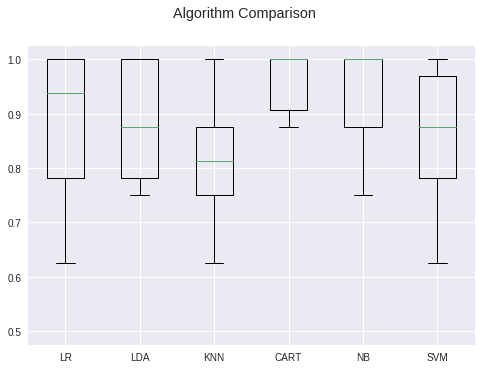

In [36]:
# compare algorithms
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(_results) 
ax.set_xticklabels(_names) 
pyplot.show()

## Ensemble Methods ##

In [37]:
# ensembles
ensembles = []

# boosting methods
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 

# bagging methods
ensembles.append(('RF', RandomForestClassifier())) 
ensembles.append(('ET', ExtraTreesClassifier()))

In [38]:
_results_en = []
_names_en = []

for _name, _model in ensembles:
    _kfold = KFold(n_splits=_num_folds, random_state=_random_seed)
    _cv_results = cross_val_score(_model, X_train, y_train, cv=_kfold, scoring=_scoring)
    _results_en.append(_cv_results)
    _names_en.append(_name)
    _msg = '{}: {:.3%}, {:.3f}'.format(_name, _cv_results.mean(), _cv_results.std())
    print(_msg)

AB: 73.750%, 0.197
GBM: 95.000%, 0.083
RF: 96.250%, 0.057
ET: 95.000%, 0.061


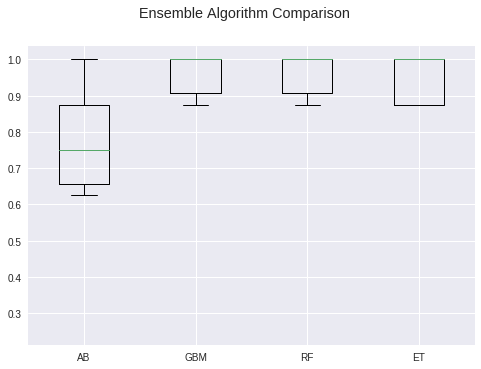

In [39]:
# compare algorithms
fig = pyplot.figure() 
fig.suptitle('Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(_results_en) 
ax.set_xticklabels(_names_en) 
pyplot.show()

##Finalize Model##

In [40]:
# prepare final model - Gradient Boosting Classifier

_model_final_a = GradientBoostingClassifier()
_model_final_a.fit(X_train, y_train)

# estimate accurary on test data

_predictions = _model_final_a.predict(X_test)
print(accuracy_score(y_test, _predictions))
print(confusion_matrix(y_test, _predictions))
print(classification_report(y_test, _predictions))

0.952380952381
[[7 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 1 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00         7
          2       1.00      1.00      1.00         5
          3       0.00      0.00      0.00         0
          4       1.00      1.00      1.00         3
          5       1.00      0.50      0.67         2
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         2

avg / total       1.00      0.95      0.97        21



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1125: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [41]:
# prepare final model - ExtraTreesClassifier

_model_final_b = ExtraTreesClassifier()
_model_final_b.fit(X_train, y_train)

# estimate accurary on test data

_predictions = _model_final_b.predict(X_test)
print(accuracy_score(y_test, _predictions))
print(confusion_matrix(y_test, _predictions))
print(classification_report(y_test, _predictions))

1.0
[[7 0 0 0 0 0]
 [0 5 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00         7
          2       1.00      1.00      1.00         5
          4       1.00      1.00      1.00         3
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        21

